In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#function for display selected img
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In below cell enter path of any image

In [3]:
#chane if you want
path = 'DATA/coins_on_white.jpg'
width = 800 
height = 600

Displaying selected image

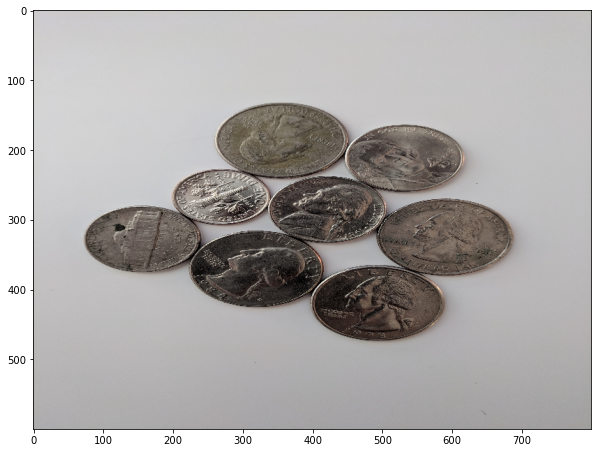

In [4]:
img = cv2.imread(path)
img = cv2.resize(img,(width,height))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
display(img)

Just run all below cell

In [5]:
from matplotlib import cm

In [6]:
#creating function for select color
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

Now making list for 10 different color rgb value for display segmentation

In [7]:
colors = []
# One color for each single digit
for i in range(10):
    colors.append(create_rgb(i))

In [8]:
# Default settings
current_marker = 1
marks_updated = False
n_markers = 10

In [9]:
def mouse_callback(event, x, y,flags, param):
    
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 5,(current_marker) , -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(img_copy, (x, y), 5,colors[current_marker] , -1)
        marks_updated = True


* Run below cell you will get 3 different windows
* click on any ware you fill that is same object on **Image** window.
* When you think their is different object click on any(1 to 9) digit from your keyboard(defualt is 1).
* example
    - click on **1** from keyoard and click on Image window which you fill is same object.
    - now click on number **2** once again click on different object in Image window and so on.....
* when you click like wise segmentation done in **segments** window and boundry creation on **segmented_boundry**.
* If you want to clear segmentation click **C** key from keyoard.
* If you want to exit click **Esc** key from keyoard.

In [10]:
cv2.namedWindow('Image')
cv2.setMouseCallback('Image',mouse_callback)

img = cv2.imread(path)
img = cv2.resize(img,(width,height))
img_copy = img.copy()
img_seg_boundry = img.copy()
segments = np.zeros(img_copy.shape,dtype=np.uint8)
marker_image = np.zeros(img_copy.shape[:2],dtype=np.int32)
while True:
    cv2.imshow('Image',img_copy)
    cv2.imshow('segmented_boundries',img_seg_boundry)
    cv2.imshow('Segments', segments)



    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break

    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        img_copy = img.copy()
        marker_image = np.zeros(img.shape[0:2], dtype=np.int32)
        segments = np.zeros(img.shape,dtype=np.uint8)
        img_seg_boundry = img.copy()

    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit

        current_marker  = int(chr(k))


    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:

        marker_image_copy = marker_image.copy()
        cv2.watershed(img, marker_image_copy)

        segments = np.zeros(img.shape,dtype=np.uint8)

        contours, hierarchy = cv2.findContours(marker_image_copy, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

        # For every entry in contours
        for i in range(len(contours)):

            # last column in the array is -1 if an external contour (no contours inside of it)
            if hierarchy[0][i][3] == -1:

                # We can now draw the external contours from the list of contours
                cv2.drawContours(img_seg_boundry, contours, i, (0,0,255), 1)


        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]



            marks_updated = False

cv2.destroyAllWindows()